# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import zero_one_loss, confusion_matrix

# Preprocessing Data set

* Importing dataset

In [2]:
cleveland_dataset = pd.read_csv('cleveland_kaggle.csv')

## Checking if there is any missing values

1. Using HEATMAP()

<AxesSubplot:>

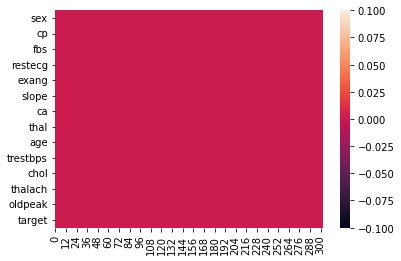

In [3]:
sns.heatmap(cleveland_dataset.isna().transpose())

2. Using DISPLOT()

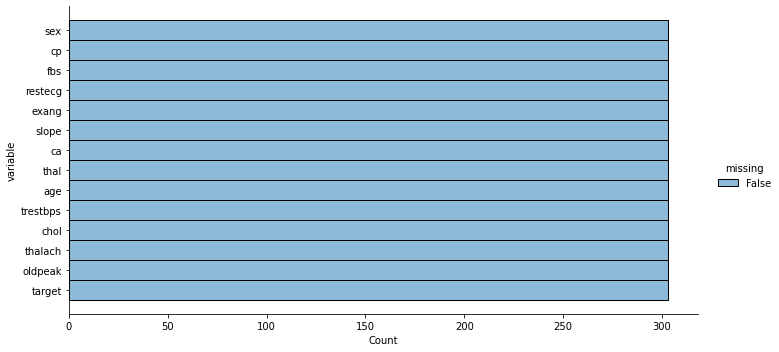

In [4]:
sns.displot(data=cleveland_dataset.isna().melt(value_name="missing"),y="variable", hue="missing", aspect=2)

## Seprating target column from Features

In [5]:
X = cleveland_dataset.iloc[:, :-1].values
y = cleveland_dataset.iloc[:, -1].values

In [6]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


## Splitting to Train and Test dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

## Feature Scaling

In [8]:
sc = StandardScaler()
X_train[:,8:] = sc.fit_transform(X_train[:,8:])
X_test[:,8:] = sc.fit_transform(X_test[:,8:])

In [9]:
print(X_train)

[[ 1.          3.          0.         ... -0.79363527  0.5213232
  -0.18790796]
 [ 0.          2.          0.         ...  0.4313981   0.95237046
  -0.86597584]
 [ 1.          0.          0.         ...  0.69937415  0.26269484
  -0.86597584]
 ...
 [ 1.          0.          0.         ... -0.6405061   0.77995156
  -0.01839099]
 [ 1.          0.          0.         ... -1.09989361 -1.59080839
   0.32064295]
 [ 1.          2.          1.         ...  0.01029288  0.99547519
  -0.86597584]]


#  SVM Models

## Linear SVM

1. Train the model

In [10]:
classifier_linear = SVC(kernel='linear', random_state=1)
classifier_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

2. Prediction

In [11]:
y_predict = classifier_linear.predict(X_test)

In [12]:
print(y_predict)

[1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1]


In [13]:
print(y_test)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1]


3. Accuracy of the model

In [14]:
accuracy = accuracy_score(y_test, y_predict)
# Converting accuracy to percentage
print(accuracy * 100)

84.61538461538461


## RBF SVM

1. Training model

In [15]:
classifier_rbf = SVC(kernel="rbf", random_state=1)
classifier_rbf.fit(X_train, y_train)

SVC(random_state=1)

2. Prediction

In [16]:
y_predict = classifier_rbf.predict(X_test)

In [17]:
print(y_predict)

[1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0]


In [18]:
print(y_test)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1]


3. Accuracy

In [19]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy * 100)

84.61538461538461


## Poly SVM

1. Taining the  model

In [20]:
classifier_poly = SVC(kernel="poly", random_state=1)
classifier_poly.fit(X_train,y_train)

SVC(kernel='poly', random_state=1)

2. Prediction

In [21]:
y_predict =  classifier_poly.predict(X_test)
print(y_predict)

[1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1]


3. Accuracy

In [22]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy*100)

84.61538461538461


## SIGMOID SVM

1. Training the model

In [23]:
classifier_sigmoid = SVC(kernel='sigmoid', random_state=1)
classifier_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=1)

2. Prediction

In [24]:
y_predict = classifier_sigmoid.predict(X_test)
print(y_predict)

[1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0]


In [25]:
print(y_test)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1]


3. Accuracy

In [26]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy*100)

82.41758241758241


## PRECOMPUTED

1. Training the model

In [27]:
kernel_train = np.dot(X_train, X_train.T)  # linear kernel

In [28]:
classifier_precomputed = SVC(kernel='precomputed', random_state=1)
classifier_precomputed.fit(kernel_train, y_train)

SVC(kernel='precomputed', random_state=1)

Prediction

In [29]:
kernel_test = np.dot(X_test, X_train.T)
y_pred = classifier_precomputed.predict(kernel_test)
print(y_pred)

[1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1]


Accuracy

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

84.61538461538461


In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[33  8]
 [ 6 44]]


Calculting Zero-One-Loss

In [32]:
zero_one_loss_metric = zero_one_loss(y_test, y_pred)
print(zero_one_loss_metric)

0.15384615384615385


# Regression

## Logistic Regression

Train the Model


In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

Prediction

In [34]:
y_predict = lr.predict(X_test)

Accuracy

In [35]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8571428571428571
